In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

# Def the filter I use

In [18]:
df_filter =  np.ones((5,5))/25

# Image open

# Def Function

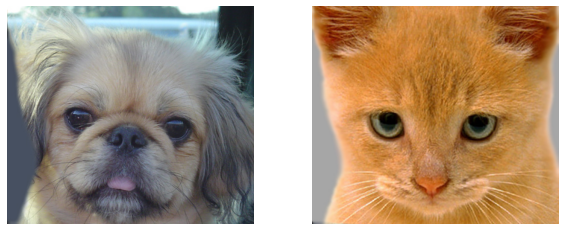

In [27]:
dog = cv2.imread('./data/hybrid_images-1/resources/dog.jpg')
cat = cv2.imread('./data/hybrid_images-1/resources/cat.jpg')
rgb_dog = np.array(cv2.cvtColor(dog, cv2.COLOR_BGR2RGB),dtype=np.uint8)
rgb_cat = np.array(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB),dtype=np.uint8)
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(rgb_dog)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(rgb_cat)
plt.axis('off')
plt.show()

In [28]:
import numpy as np

def cross_correlation_2d(img, kernel):
    '''Given a kernel of arbitrary m x n dimensions, with both m and n being
    odd, compute the cross correlation of the given image with the given
    kernel, such that the output is of the same dimensions as the image and that
    you assume the pixels out of the bounds of the image to be zero. Note that
    you need to apply the kernel to each channel separately, if the given image
    is an RGB image.

    Inputs:
        img:    Either an RGB image (height x width x 3) or a grayscale image
                (height x width) as a numpy array.
        kernel: A 2D numpy array (m x n), with m and n both odd (but may not be
                equal).

    Output:
        Return an image of the same dimensions as the input image (same width,
        height and the number of color channels)
    '''
    k_h = kernel.shape[0]
    k_w = kernel.shape[1]
    index_h = k_h // 2
    index_w = k_w // 2


    padding_img = np.pad(array=img,pad_width = ((index_h,index_h),(index_w,index_w),(0,0)),mode = 'constant')

    h,w,c = padding_img.shape

    output_img = np.zeros((h-k_h+1,w-k_w+1,c))
    for channel in range(c):
        for width in range(index_w,w-index_w):
            for height in range(index_h,h-index_h):

                F = padding_img[height-index_h:height+index_h+1,width-index_w:width+index_w+1,channel]

                output_img[height-index_h,width-index_w,channel] = np.sum(F * kernel)

    return output_img

def convolve_2d(img, kernel):
    '''Use cross_correlation_2d() to carry out a 2D convolution.

    Inputs:
        img:    Either an RGB image (height x width x 3) or a grayscale image
                (height x width) as a numpy array.
        kernel: A 2D numpy array (m x n), with m and n both odd (but may not be
                equal).

    Output:
        Return an image of the same dimensions as the input image (same width,
        height and the number of color channels)
    '''
    rotated_filter_ = kernel[::-1,::-1]

    result = cross_correlation_2d(img,rotated_filter_)

    return result

def gaussian_blur_kernel_2d(sigma, height, width):
    '''Return a Gaussian blur kernel of the given dimensions and with the given
    sigma. Note that width and height are different.

    Input:
        sigma:  The parameter that controls the radius of the Gaussian blur.
                Note that, in our case, it is a circular Gaussian (symmetric
                across height and width).
        width:  The width of the kernel.
        height: The height of the kernel.

        Return a kernel of dimensions height x width such that convolving it
        with an image results in a Gaussian-blurred image.
    '''

    xx,yy = np.meshgrid(np.linspace(start=-(width//2),stop=width//2,num=width),
                        np.linspace(start=-(height//2),stop=(height//2),num=height))

    ex = np.exp(-((xx**2) + (yy**2)) / (2*(sigma**2)))

    g_filter = (ex / np.sum(ex))

    g_filter = g_filter.astype(np.float64)

    return g_filter

def low_pass(img, sigma, size):
    '''Filter the image as if its filtered with a low pass filter of the given
    sigma and a square kernel of the given size. A low pass filter supresses
    the higher frequency components (finer details) of the image.

    Output:
        Return an image of the same dimensions as the input image (same width,
        height and the number of color channels)
    '''
    gaussian_kernel = gaussian_blur_kernel_2d(sigma = sigma,height=size[0],width=size[1])
    result = convolve_2d(img,gaussian_kernel)

    return result

def high_pass(img, sigma, size):
    '''Filter the image as if its filtered with a high pass filter of the given
    sigma and a square kernel of the given size. A high pass filter suppresses
    the lower frequency components (coarse details) of the image.

    Output:
        Return an image of the same dimensions as the input image (same width,
        height and the number of color channels)
    '''


    result = img - low_pass(img,sigma=sigma,size=size)

    return result

def create_hybrid_image(img1, img2, sigma1, size1, high_low1, sigma2, size2,
                        high_low2, mixin_ratio, scale_factor):
    '''This function adds two images to create a hybrid image, based on
    parameters specified by the user.'''
    high_low1 = high_low1.lower()
    high_low2 = high_low2.lower()

    if img1.dtype == np.uint8:
        img1 = img1.astype(np.float64) / 255.0
        img2 = img2.astype(np.float64) / 255.0

    if high_low1 == 'low':
        img1 = low_pass(img1, sigma1, size1)
    else:
        img1 = high_pass(img1, sigma1, size1)

    if high_low2 == 'low':
        img2 = low_pass(img2, sigma2, size2)
    else:
        img2 = high_pass(img2, sigma2, size2)

    img1 *=  (1 - mixin_ratio)
    img2 *= mixin_ratio
    hybrid_img = (img1 + img2) * scale_factor
    return (hybrid_img * 255).clip(0, 255).astype(np.uint8)




In [29]:
dog_blur = low_pass(rgb_dog /255,sigma=5,size=(41,41))

(-0.5, 409.5, 360.5, -0.5)

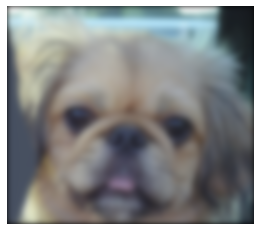

In [30]:
plt.figure(figsize=(10, 4))
plt.imshow(dog_blur)
plt.axis('off')

In [31]:
cat_hp = high_pass(rgb_cat/255,sigma=5,size=(41,41))

In [33]:
cat_showing = (cat_hp + 0.5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 409.5, 360.5, -0.5)

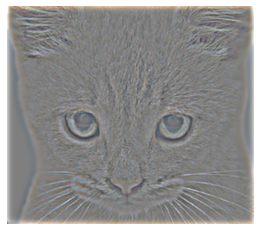

In [34]:
plt.figure(figsize=(10, 4))

plt.imshow(cat_showing)
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 409.5, 360.5, -0.5)

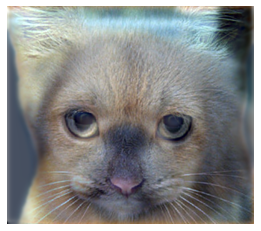

In [35]:
plt.figure(figsize=(10, 4))

plt.imshow(cat_hp + dog_blur)
plt.axis('off')

In [36]:
hy_img = create_hybrid_image(img1=rgb_dog,
                             img2=rgb_cat,
                             sigma1=10,
                             size1=(11,11),
                             high_low1='low',
                             sigma2=10,
                             size2=(11,11),
                             high_low2='high',
                             mixin_ratio=0.6,
                             scale_factor=2
                             )

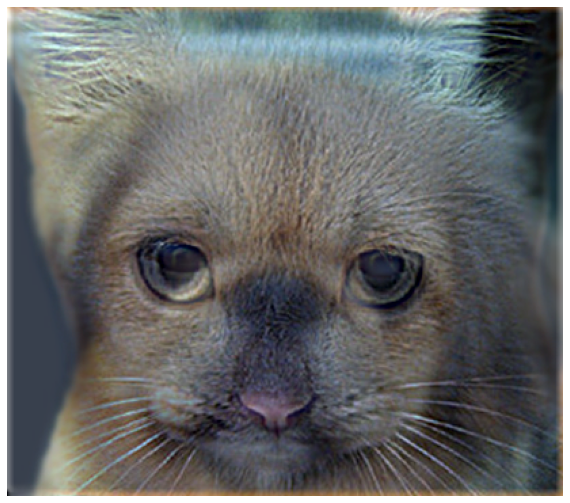

In [37]:
plt.figure(figsize=(16, 9))

plt.imshow(hy_img)
plt.axis('off')
#plt.savefig('./data/hybrid.png',dpi =300)
plt.show()